<h1><div align="center">Deep Learning From Scratch</div></h1>
<h2><div align="center">Simple Network</div></h2>
<div align="center">Bruno Gonçalves</div>
<div align="center"><a href="http://www.data4sci.com/">www.data4sci.com</a></div>
<div align="center">@bgoncalves, @data4sci</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -p numpy,matplotlib,pandas,seaborn

Fri Apr 19 2019 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
matplotlib 3.0.3
pandas 0.24.2
seaborn 0.9.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


# Load Dataset

In [3]:
X_train = np.load('input/X_train.npy')
X_test = np.load('input/X_test.npy')
y_train = np.load('input/y_train.npy')
y_test = np.load('input/y_test.npy')

Preprocessing

In [4]:
input_layer_size = X_train.shape[1]

X_train /= 255.
X_test /= 255.

## Initialize weights

We define the initializatino function as we'll have to call it more than once

In [5]:
def init_weights(L_in, L_out):
    epsilon = 0.12

    return 2*np.random.rand(L_out, L_in+1)*epsilon - epsilon

Set the layer sizes we'll be using

In [6]:
hidden_layer_size = 50
num_labels = 10

Initialize the weights

In [7]:
Theta1 = init_weights(input_layer_size, hidden_layer_size)
Theta2 = init_weights(hidden_layer_size, num_labels)

## Utility functions

One-hot encoding to define the labels

In [8]:
def one_hot(K, pos):
    y0 = np.zeros(K)
    y0[pos] = 1

    return y0

Activation function, just as before

In [9]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def sigmoidGradient(z):
    h = sigmoid(z)
    return h*(1-h)

def accuracy(y_, y):
    return np.mean((y_ == y.flatten()))*100.

## Forward Propagation and Prediction

Same functions defined above

In [10]:
def forward(Theta, X, active):
    N = X.shape[0]

    # Add the bias column
    X_ = np.concatenate((np.ones((N, 1)), X), 1)

    # Multiply by the weights
    z = np.dot(X_, Theta.T)

    # Apply the activation function
    a = active(z)

    return a

def predict(Theta1, Theta2, X):
    h1 = forward(Theta1, X, sigmoid)
    h2 = forward(Theta2, h1, sigmoid)

    return np.argmax(h2, 1)

## Back propagation

In [11]:
def backprop(Theta1, Theta2, X, y):
    N = X.shape[0]
    K = Theta2.shape[0]

    J = 0

    Delta2 = np.zeros(Theta2.shape)
    Delta1 = np.zeros(Theta1.shape)

    for i in range(N):
        # Forward propagation, saving intermediate results
        a1 = np.concatenate(([1], X[i]))  # Input layer

        z2 = np.dot(Theta1, a1)
        a2 = np.concatenate(([1], sigmoid(z2)))  # Hidden Layer

        z3 = np.dot(Theta2, a2)
        a3 = sigmoid(z3)  # Output layer

        y0 = one_hot(K, y[i])

        # Cross entropy
        J -= np.dot(y0.T, np.log(a3))+np.dot((1-y0).T, np.log(1-a3))

        # Calculate the weight deltas
        delta_3 = a3-y0
        delta_2 = np.dot(Theta2.T, delta_3)[1:]*sigmoidGradient(z2)

        Delta2 += np.outer(delta_3, a2)
        Delta1 += np.outer(delta_2, a1)

    J /= N

    Theta1_grad = Delta1/N
    Theta2_grad = Delta2/N

    return [J, Theta1_grad, Theta2_grad]

## Training procedure
The basic idea is the same as for the linear and logistic regression cases

In [12]:
step = 0
tol = 1e-4
J_old = 1/tol
diff = 1

acc_train = []
acc_test = []
J_val = []
steps = []

while diff > tol:
    J_train, Theta1_grad, Theta2_grad = backprop(Theta1, Theta2, X_train, y_train)

    diff = abs(J_old-J_train)
    J_old = J_train
    J_val.append(J_train)
    
    step += 1

    if step % 10 == 0:
        pred_train = predict(Theta1, Theta2, X_train)
        pred_test = predict(Theta1, Theta2, X_test)

        J_test, T1_grad, T2_grad = backprop(Theta1, Theta2, X_test, y_test)
        
        acc_train.append(accuracy(pred_train, y_train))
        acc_test.append(accuracy(pred_test, y_test))
        steps.append(step)
        
        print(step, J_train, J_test, acc_train[-1], acc_test[-1])

    Theta1 -= .5*Theta1_grad
    Theta2 -= .5*Theta2_grad

10 3.1291753860666778 3.136960891294815 43.580000000000005 43.0
20 2.9167902906936987 2.9446602205385557 59.160000000000004 55.1
30 2.603769168076834 2.6579288877993905 62.96000000000001 59.699999999999996
40 2.2804339384826813 2.3564282797253466 66.97999999999999 63.7
50 2.020640681525116 2.1098938447015403 71.41999999999999 68.30000000000001
60 1.8217778527123045 1.9191424477811603 75.3 71.89999999999999
70 1.6635058765800954 1.766777938511813 78.24 75.0
80 1.5326041982455285 1.6408468843796575 80.86 76.9
90 1.4222146978617052 1.534979159378096 82.72 78.10000000000001
100 1.3283330821233696 1.4453966968730128 83.91999999999999 80.80000000000001
110 1.2479904329251943 1.369254959226355 85.1 81.69999999999999
120 1.178707428440679 1.3041265102022936 85.88 83.0
130 1.118424693106811 1.247947341912282 86.9 83.8
140 1.0654957115754506 1.199036214958088 87.46000000000001 84.8
150 1.0186392323760602 1.1560717547952608 88.12 84.89999999999999
160 0.9768659071718415 1.118033253058756 88.58 85

1410 0.27237673570213844 0.5823439250020576 96.72 90.5
1420 0.2708693269625314 0.5818125709781776 96.76 90.5
1430 0.2693736828199433 0.5812894341904684 96.78 90.5
1440 0.26788965024880373 0.5807743764154975 96.8 90.60000000000001
1450 0.266417079559804 0.5802672628593434 96.82 90.60000000000001
1460 0.26495582428168307 0.5797679620065473 96.84 90.60000000000001
1470 0.26350574104921426 0.579276345475552 96.86 90.60000000000001
1480 0.2620666894973062 0.5787922878809083 96.86 90.60000000000001
1490 0.2606385321610089 0.5783156667023718 96.86 90.60000000000001
1500 0.2592211343813086 0.5778463621610306 96.89999999999999 90.60000000000001
1510 0.25781436421649934 0.57738425710253 96.92 90.60000000000001
1520 0.256418092358927 0.5769292368873566 96.94 90.60000000000001
1530 0.25503219205691624 0.5764811892881312 96.94 90.60000000000001
1540 0.2536565390416112 0.5760400043937556 96.94 90.60000000000001
1550 0.25229101145849625 0.5756055745202384 97.0 90.60000000000001
1560 0.250935489803337

## Accuracy during training

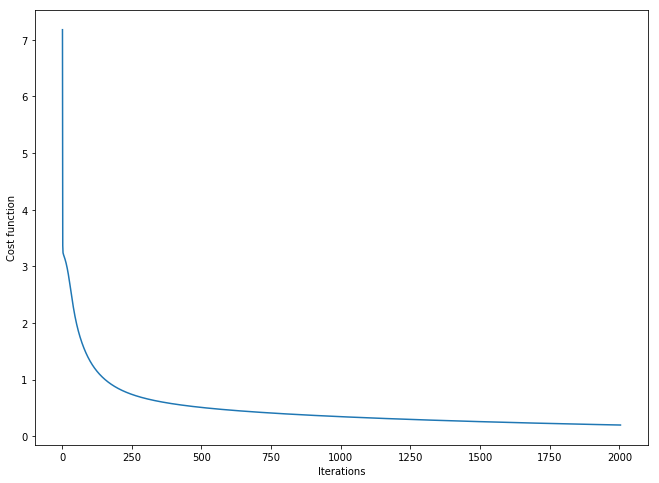

In [14]:
plt.plot(np.arange(1, len(J_val)+1), J_val)
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.gcf().set_size_inches(11, 8)

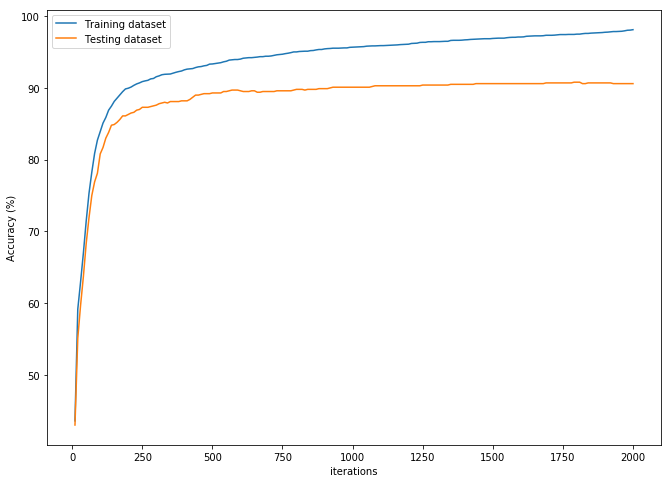

In [15]:
plt.plot(steps, acc_train, label='Training dataset')
plt.plot(steps, acc_test, label='Testing dataset')
plt.xlabel("iterations")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.gcf().set_size_inches(11, 8)

## Save the trained model

In [ ]:
np.save('Theta1.npy', Theta1)
np.save('Theta2.npy', Theta2)